# YouTube Data API v3 - Mapping Corridor Digital's Network

### Python Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

## Custom modules

In [2]:
import config # api_key is stored in config.py
import youtube_requests # Functions for making youtube_requests
import data_processing # Functions for data processing    
import network_graphs # Functions for creating a network graph

Run autoloader to automatically reimport custom modules

In [3]:
%load_ext autoreload

%autoreload 1

%aimport network_graphs
%aimport youtube_requests
%aimport data_processing

## Create a list of channels to graph network

Here we are graphing Corridor, Corridor Crew, Corridor Cast, Node, and the Guilletine Channel. These are all channels related to the [Corridor Digital](https://www.youtube.com/user/CorridorDigital) production studio.

In [4]:
CORRIDOR_FIVE = ['UCNSeDrWRGxx5p2l3tj7RWQw',
                'UCsn6cjffsvyOZCZxvGoJxGg',
                'UCSpFnDQr88xCZ80N-X7t0nQ',
                'UCI4Wh0EQPjGx2jJLjmTsFBQ',
                'UCb8ewylk7d2M_1dLGEiFmuQ']

# Youtube Channel Details by Network

In [5]:
%%time
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network(CORRIDOR_FIVE, 3)

# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G using matplotlib - gets messy with lots of data
#network_graphs.graph_nx_graph(G)

Havent seen this list, request and cache
25 total neighbors; 0 out of 5 channels do not feature channels
97 total neighbors; 2 out of 20 channels do not feature channels
253 total neighbors; 11 out of 86 channels do not feature channels
CPU times: user 12.6 s, sys: 1 s, total: 13.6 s
Wall time: 23.5 s


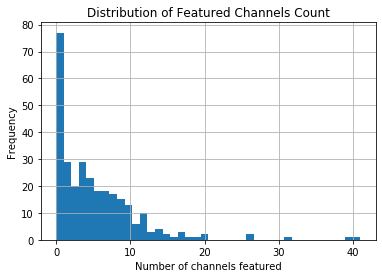

In [6]:
DF.hist(column='featuredChannelsCount', bins=40)
plt.title(label='Distribution of Featured Channels Count')
plt.xlabel(xlabel='Number of channels featured')
plt.ylabel(ylabel='Frequency');

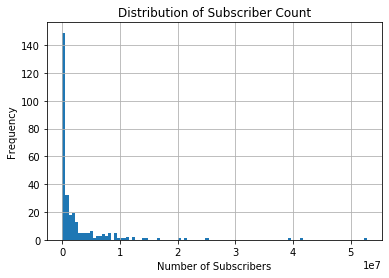

In [7]:
DF.hist(column = 'subscriberCount', bins=100)
plt.title(label='Distribution of Subscriber Count')
plt.xlabel(xlabel='Number of Subscribers')
plt.ylabel(ylabel='Frequency');

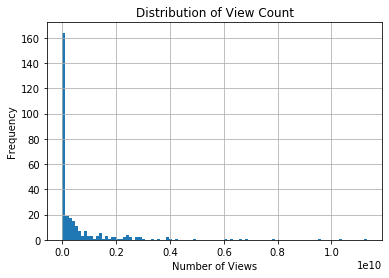

In [8]:
DF.hist(column = 'viewCount', bins=100)
plt.title(label='Distribution of View Count')
plt.xlabel(xlabel='Number of Views')
plt.ylabel(ylabel='Frequency');

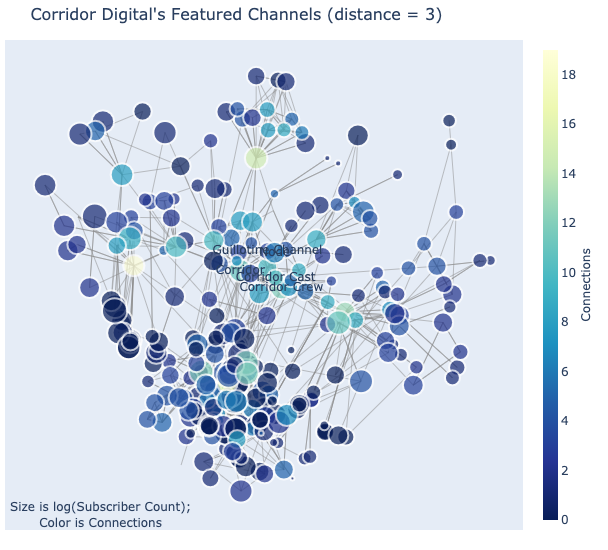

In [9]:
fig = network_graphs.plotly_network_graph(G, "Connections", "Corridor Digital's Featured Channels (distance = 3)")
fig # Interactive version of the figure for notebooks

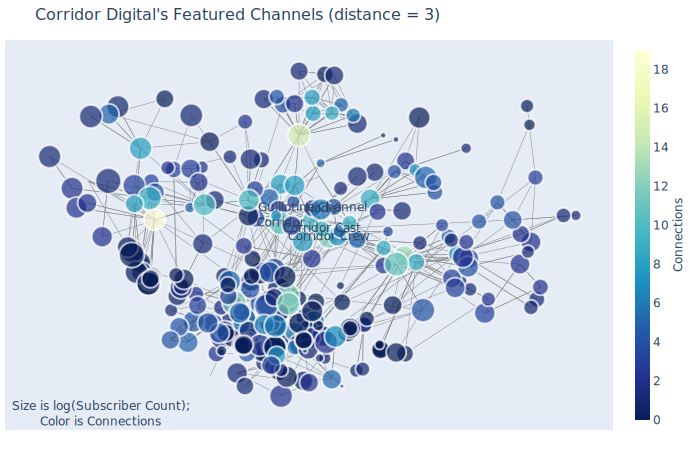

In [10]:
# Show figure for GitHub
fig.show("svg")

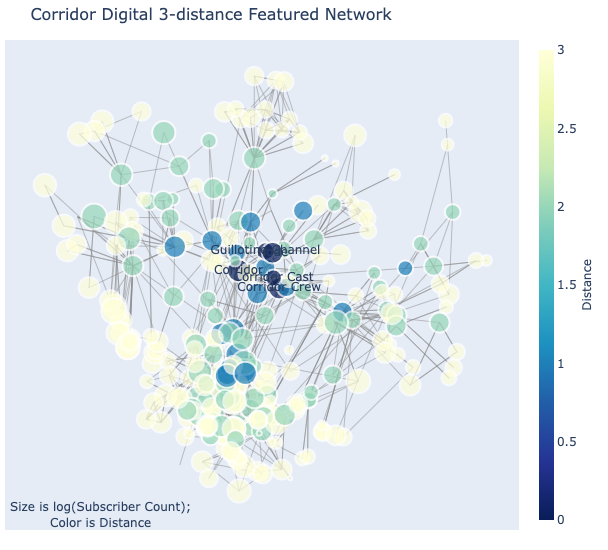

In [11]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network')
fig

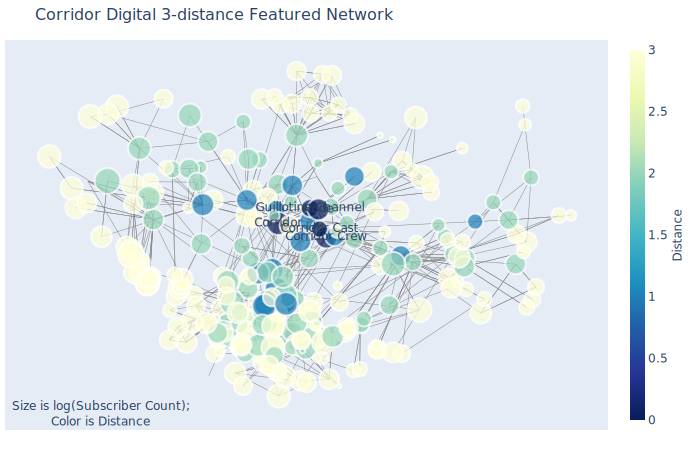

In [12]:
# Show figure for GitHub
fig.show("svg")

## Page Rank, In-Degree centrality, Betweeness Centrality, and In-Degree value

In [13]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

FEATURES = ['title','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality','page_rank','subscriberCount','viewCount','id']

### Sort channels by page rank

Page rank is a relative measure of importance for a specific channel with the network. 

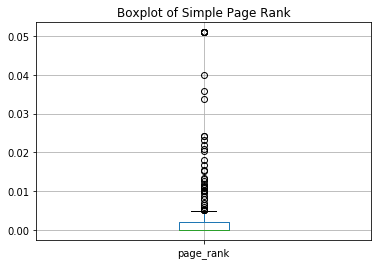

In [14]:
DF.boxplot(column='page_rank')
plt.title("Boxplot of Simple Page Rank");

In [15]:
DF[FEATURES].sort_values(
    'page_rank', ascending=False).head(8)

title  featuredChannelsCount  degree  in_degree  \
93          LMG Clips                      6      12          6   
81         TechLinked                      6      12          6   
77       ShortCircuit                      6      11          5   
71    Carpool Critics                      6      11          5   
88        Techquickie                      6      12          6   
19    Linus Tech Tips                      6      13          7   
3       Corridor Crew                     12      20          8   
72  Channel Super Fun                      4      10          6   

    betweenness_centrality  in_degree_centrality  page_rank  subscriberCount  \
93                0.000006              0.020270   0.050954           178000   
81                0.000006              0.020270   0.050954          1260000   
77                0.000000              0.016892   0.050954           948000   
71                0.000000              0.016892   0.050954            42400   
88                0.000006              0.020270   0.050954          3530000   
19                0.007908              0.023649   0.050954         11500000   
3                 0.112594              0.027027   0.039965          4110000   
72                0.000000              0.020270   0.035747           740000   

     viewCount                        id  
93    20326848  UCFLFc8Lpbwt4jPtY1_Ai5yA  
81   183112304  UCeeFfhMcJa1kjtfZAGskOCA  
77    56547046  UCdBK94H6oZT2Q7l0-b0xmMg  
71      426433  UCt-oJR5teQIjOAxCmIQvcgA  
88   527258555  UC0vBXGSyV14uvJ4hECDOl0Q  
19  3925580862  UCXuqSBlHAE6Xw-yeJA0Tunw  
3    713421868  UCSpFnDQr88xCZ80N-X7t0nQ  
72    97740352  UCBZiUUYeLfS5rIj4TQvgSvA

In [16]:
sorted_pgrank_list = list(DF[FEATURES].sort_values(
    'page_rank', ascending=False).head(8)['id'])

Lets take a look at these channels listed on the graph

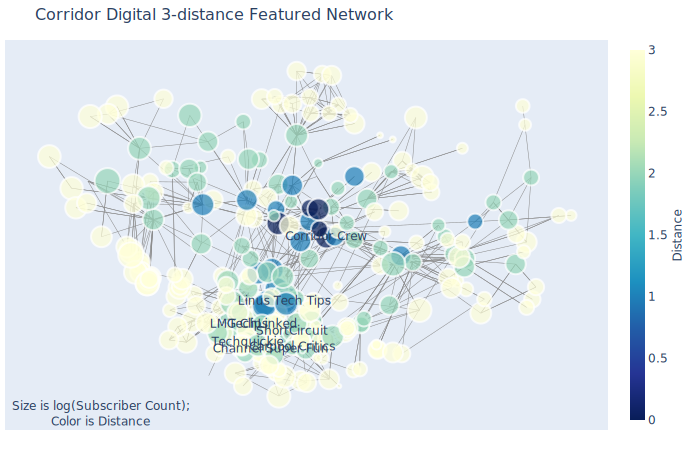

In [17]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network',
                            display_list=sorted_pgrank_list)
fig
fig.show('svg')

### Sort channels by betweenness centrality.

Betweenness centrality is a measure of connectivity for a node in a network. A higher betweenness centrality implies that the node is a critical pathway for other nodes to connect across the graph.

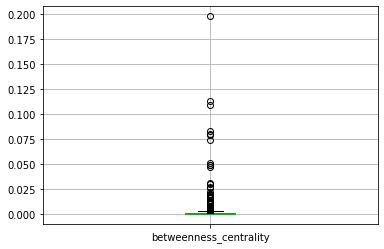

In [18]:
DF.boxplot(column='betweenness_centrality');

In [19]:
DF[FEATURES].sort_values(
    'betweenness_centrality', ascending=False).head(8)

title  featuredChannelsCount  degree  in_degree  \
1          Corridor                     11      29         18   
3     Corridor Crew                     12      20          8   
9   devinsupertramp                     10      25         15   
14        Nukazooka                      8      19         11   
22        Mike Diva                      7      15          8   
8         Film Riot                     13      23         10   
21    SoKrispyMedia                     10      18          8   
0     Corridor Cast                     10      14          4   

    betweenness_centrality  in_degree_centrality  page_rank  subscriberCount  \
1                 0.197719              0.060811   0.033708          8080000   
3                 0.112594              0.027027   0.039965          4110000   
9                 0.109190              0.050676   0.012725          5930000   
14                0.082699              0.037162   0.024340          2260000   
22                0.079615              0.027027   0.011259           650000   
8                 0.079231              0.033784   0.015556          1670000   
21                0.074173              0.027027   0.015201          1150000   
0                 0.051500              0.013514   0.021945           111000   

     viewCount                        id  
1   1469669520  UCsn6cjffsvyOZCZxvGoJxGg  
3    713421868  UCSpFnDQr88xCZ80N-X7t0nQ  
9   1438912493  UCwgURKfUA7e0Z7_qE3TvBFQ  
14   670592405  UCQqi--mpTFtGNim0WCtPH-A  
22   142897636  UC6Je0KLSDuKLfKs1lEBzKrQ  
8    191832755  UC6P24bhhCmMPOcujA9PKPTA  
21   319125593  UCKo61AAaRD00ibCWJZ321MQ  
0      5011606  UCNSeDrWRGxx5p2l3tj7RWQw

In [20]:
sorted_btwn_list = list(DF[FEATURES].sort_values(
    'betweenness_centrality', ascending=False).head(8)['id'])

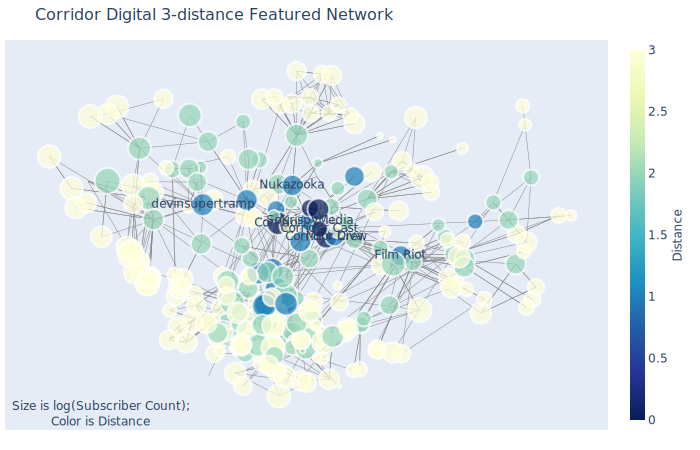

In [21]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network',
                            display_list=sorted_btwn_list)
fig
fig.show('svg')

### Sort channels by in_degree centrality.

In degree centrality is a measure of a nodes importance as a reference from other channels. A high in degree centrality value implies that the node is highly referenced by other channels within this network.

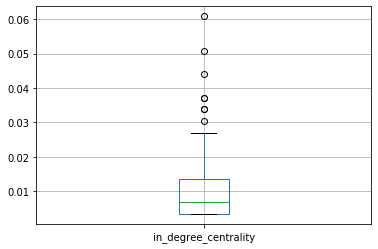

In [22]:
DF.boxplot(column='in_degree_centrality');

In [23]:
DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8)

title  featuredChannelsCount  degree  in_degree  \
1          Corridor                     11      29         18   
9   devinsupertramp                     10      25         15   
54           TomSka                     15      28         13   
14        Nukazooka                      8      19         11   
48         LetsPlay                      1      12         11   
24       RocketJump                      3      13         10   
8         Film Riot                     13      23         10   
13    Rooster Teeth                     12      21          9   

    betweenness_centrality  in_degree_centrality     page_rank  \
1                 0.197719              0.060811  3.370840e-02   
9                 0.109190              0.050676  1.272459e-02   
54                0.049283              0.043919  1.677811e-02   
14                0.082699              0.037162  2.433996e-02   
48                0.000017              0.037162  3.694135e-17   
24                0.025846              0.033784  1.446053e-10   
8                 0.079231              0.033784  1.555646e-02   
13                0.018583              0.030405  4.678766e-04   

    subscriberCount   viewCount                        id  
1           8080000  1469669520  UCsn6cjffsvyOZCZxvGoJxGg  
9           5930000  1438912493  UCwgURKfUA7e0Z7_qE3TvBFQ  
54          6440000  1657693559  UCOYWgypDktXdb-HfZnSMK6A  
14          2260000   670592405  UCQqi--mpTFtGNim0WCtPH-A  
48          3850000  2437802279  UCkxctb0jr8vwa4Do6c6su0Q  
24          9000000  1904654408  UCDsO-0Yo5zpJk575nKXgMVA  
8           1670000   191832755  UC6P24bhhCmMPOcujA9PKPTA  
13          9470000  6081602479  UCzH3iADRIq1IJlIXjfNgTpA

Lets also look at the distribution of in degree centrality values.

In [24]:
sorted_indeg_list = list(DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8)['id'])

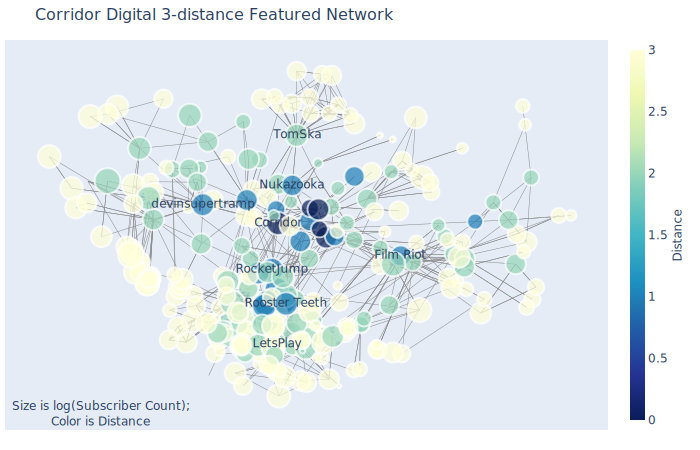

In [25]:
fig = network_graphs.plotly_network_graph(G, 
                              color_setting="Distance", 
                              title='Corridor Digital 3-distance Featured Network',
                            display_list=sorted_indeg_list)
fig.show('svg')

## Strongly Connected Components

Since this graph is a directional graph, and not all references exist in both directions. It is possible to travel through the graph of channels and not be able to return. 

Strongly connected components are portions of the graph that allows you to return to all other nodes in the graph.

In [26]:
# Create a list of strongly connected components
scc_list = [scc for scc in nx.strongly_connected_components(G)]

# Grab the largest strongly connected component
largest_scc_index = [i for i,cn in enumerate(scc_list) if len(cn) == max([len(cnn) for cnn in scc_list])][0]

# Graph out the subgraph for the largest subset of strongly connected components
H = G.subgraph(list(scc_list[largest_scc_index]))

Plot of our subgraph of strongly connected components

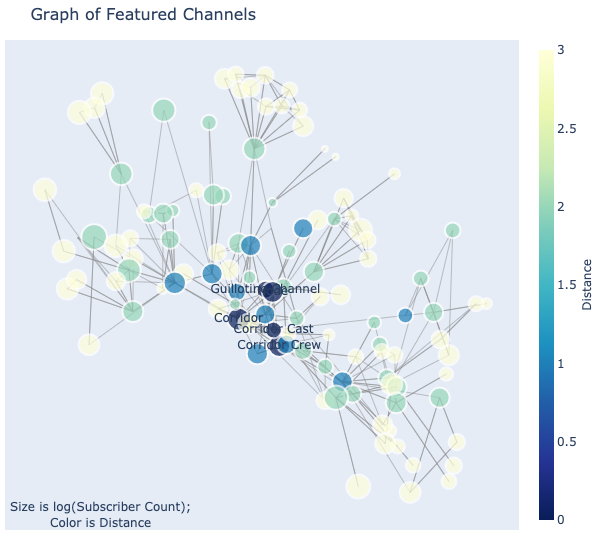

In [27]:
#network_graphs.graph_nx_graph(H)
fig = network_graphs.plotly_network_graph(H, 'Distance')
fig

Here we see that the majority of the bottom left of the graph is excluded. Meaning while there were references going from the Corridor community to Rooster Teeth, Slow Mo Guys, Hulu, and etc. There did not exist a path referencing anyone in the Corridor community (at least within a distance of three from Corridor), completely separating the graph.

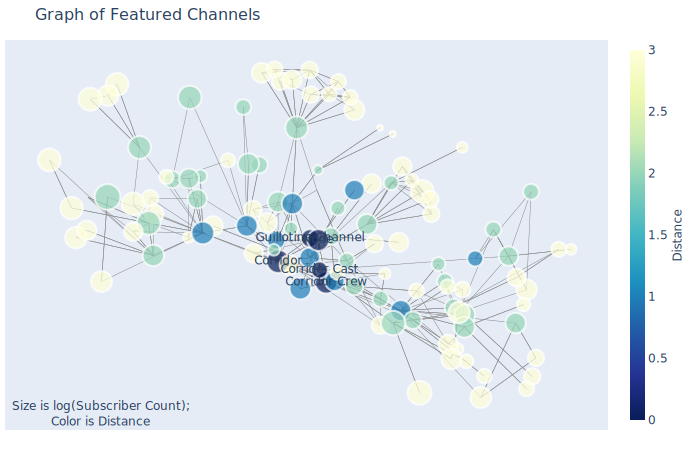

In [28]:
fig.show('svg')

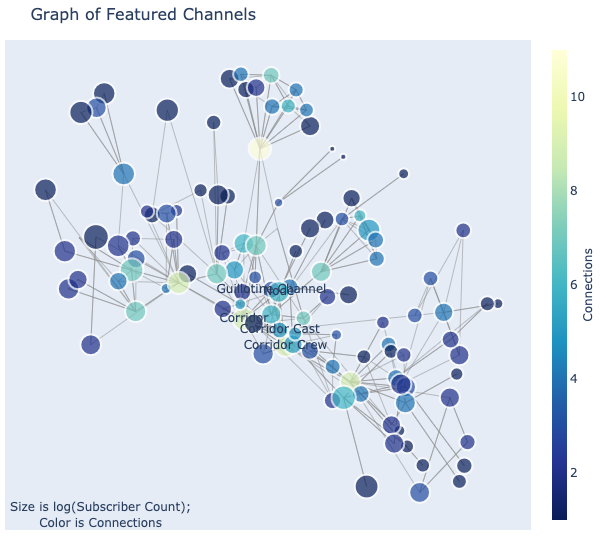

In [29]:
fig = network_graphs.plotly_network_graph(H, 'Connections')
fig

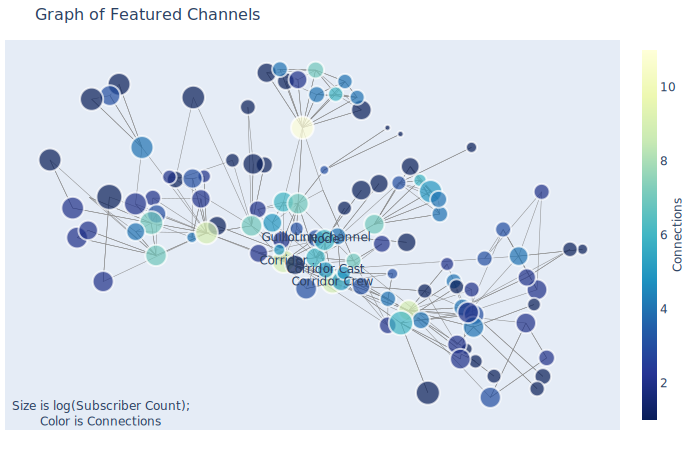

In [30]:
fig.show('svg')